<a href="https://colab.research.google.com/github/kevin-079/Mall-Customer-segmentation/blob/main/FP_ADD_Mall_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
pip install kneed

In [ ]:
# IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator

# Read Data

In [ ]:
# READ DATA

df = pd.read_csv('Mall_Customers.csv')
df.shape
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


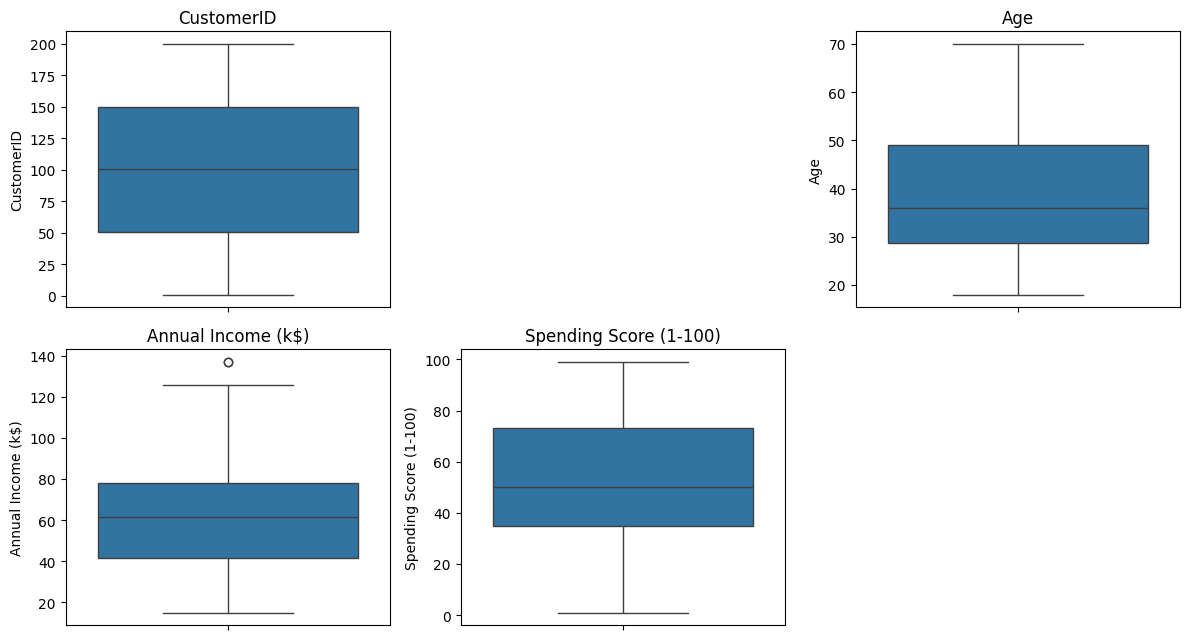

In [ ]:
plt.figure(figsize=(12, 16))

# Loop through each column and create a boxplot
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(5, 3, df.columns.get_loc(column) + 1)
        sns.boxplot(y=df[column])
        plt.title(column)

plt.tight_layout()
plt.show()

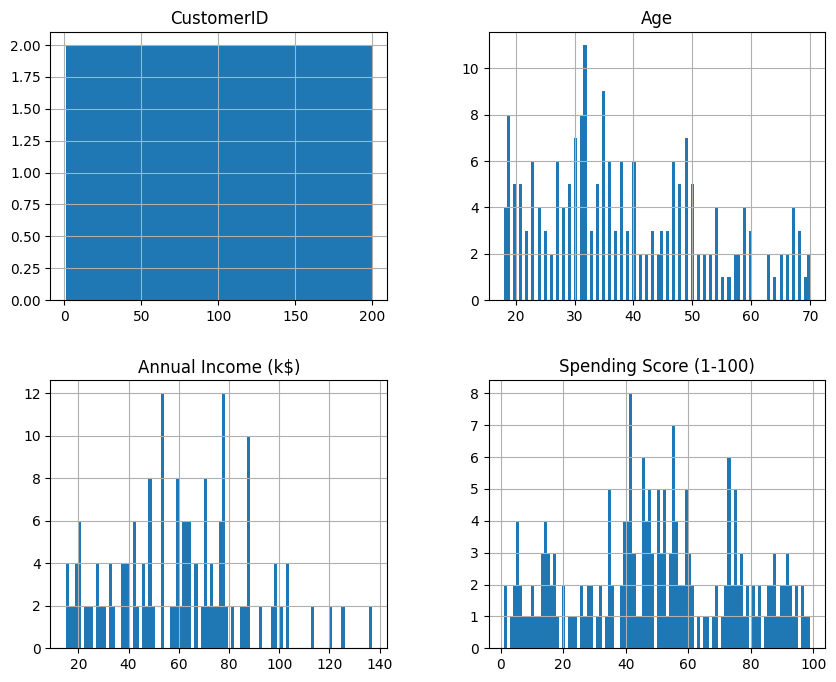

In [ ]:
df.hist(bins=100, figsize=(10,8))
plt.show()

# Pre-Processing

In [ ]:
# Hapus outliers hanya untuk kolom numerik
for column in df.select_dtypes(include=np.number).columns:
    q75, q25 = np.percentile(df[column], [75, 25])
    iqr = q75 - q25
    iqrMin = q25 - (iqr * 1.5)
    iqrMax = q75 + (iqr * 1.5)

    print(column)
    print(f"IQR Min: {iqrMin}")
    print(f"IQR Max: {iqrMax}")
    print(f"Count IQR Min: {len(df[df[column] < iqrMin])}")
    print(f"Count IQR Max: {len(df[df[column] > iqrMax])}")

    # Drop outliers
    df = df.drop(df[df[column] < iqrMin].index, axis=0)
    df = df.drop(df[df[column] > iqrMax].index, axis=0)


CustomerID
IQR Min: -98.5
IQR Max: 299.5
Count IQR Min: 0
Count IQR Max: 0
Age
IQR Min: -1.625
IQR Max: 79.375
Count IQR Min: 0
Count IQR Max: 0
Annual Income (k$)
IQR Min: -13.25
IQR Max: 132.75
Count IQR Min: 0
Count IQR Max: 2
Spending Score (1-100)
IQR Min: -21.625
IQR Max: 129.375
Count IQR Min: 0
Count IQR Max: 0


In [ ]:
df = df.drop(['CustomerID','Gender'], axis=1)

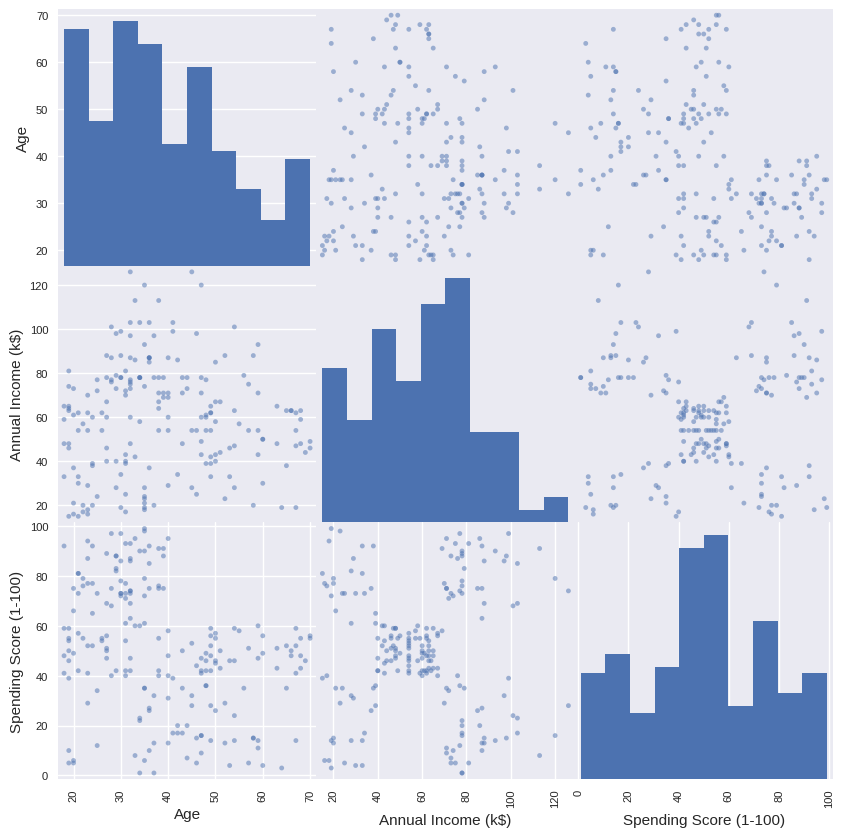

In [ ]:
plt.style.use("seaborn-v0_8")
pd.plotting.scatter_matrix(df, figsize=(10, 10))
plt.show()

In [ ]:
#PERFORM MIN-MAX SCALING

X = MinMaxScaler().fit_transform(df)

In [ ]:
df_minmax = pd.DataFrame(data = X, columns = df.columns.tolist())
df_minmax

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.009009,0.051020
3,0.096154,0.009009,0.775510
4,0.250000,0.018018,0.397959
...,...,...,...
193,0.384615,0.882883,0.918367
194,0.557692,0.945946,0.153061
195,0.326923,0.945946,0.795918
196,0.519231,1.000000,0.275510


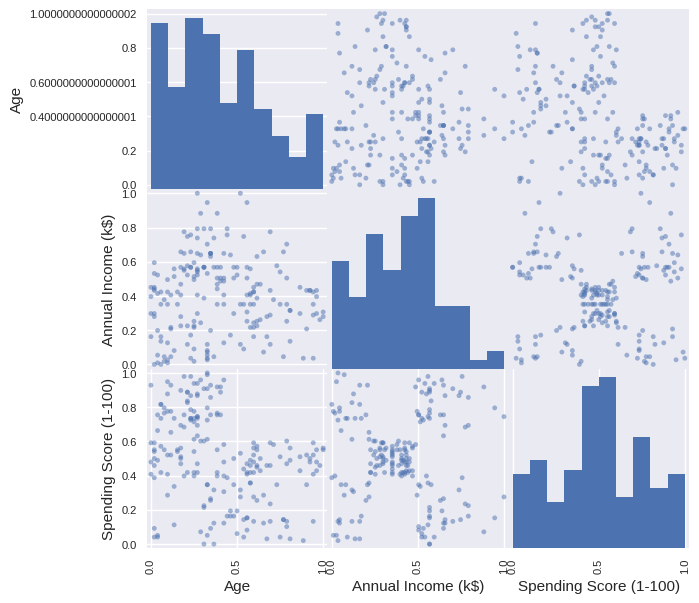

In [ ]:
# Tampilkan Korelasi antar Featrures atau Attributes

pd.plotting.scatter_matrix(df_minmax, figsize=(7, 7))
plt.show()

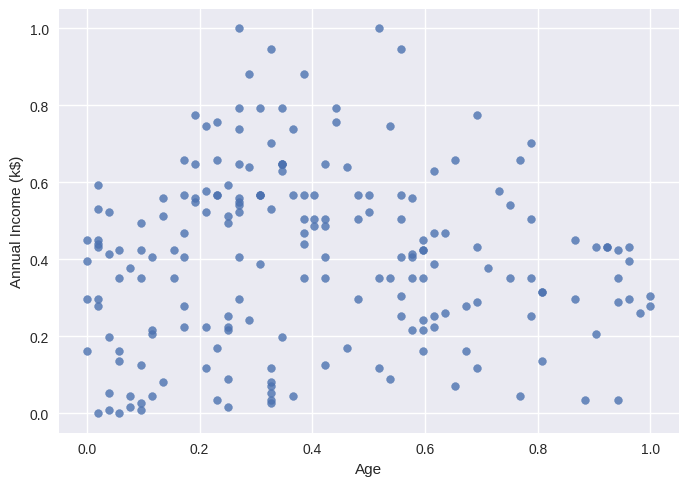

In [ ]:
# Umur vs Gaji

df_minmax.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

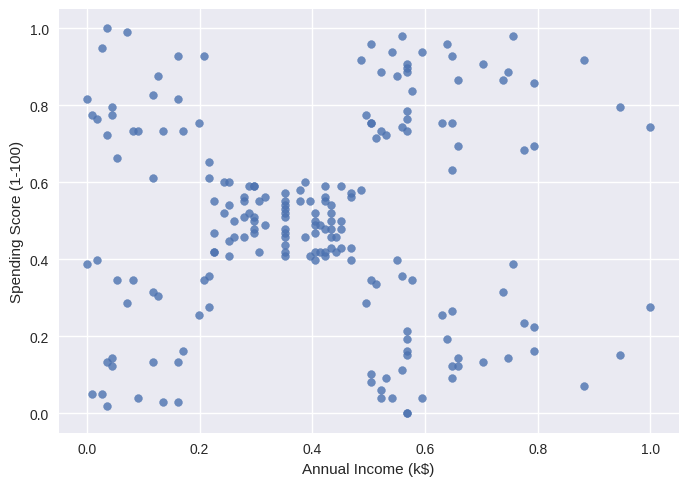

In [ ]:
# Gaji vs Pengeluaran

df_minmax.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# K-Means Clustering

In [ ]:
n_clusters = range(2 , 13)
inertia_errors = []
silhouette_scores = []
# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters= k , random_state= 42)
    #TRAIN MODEL
    model.fit(X)
    #CALCULATE INERTIA
    inertia_errors.append(model.inertia_)
    #CALCULATE SILHOUETTE SCORE
    silhouette_scores.append(silhouette_score(X , model.labels_))
print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [23.37501511486369, 18.051052301228857, 15.313417565128578]

Silhouette Scores: [0.3571110529133075, 0.3607919604410471, 0.3645467568345949]


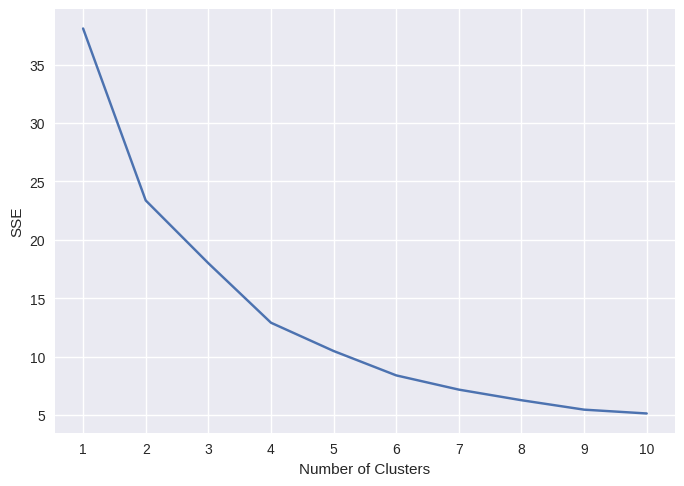

In [ ]:
# SSE vs K Cluster

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Cari K terbaik berdasarkan tren

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

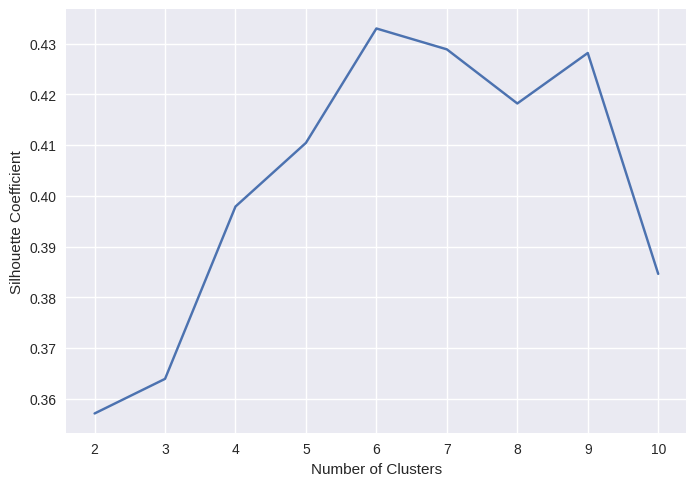

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

[1 1 2 1 1]


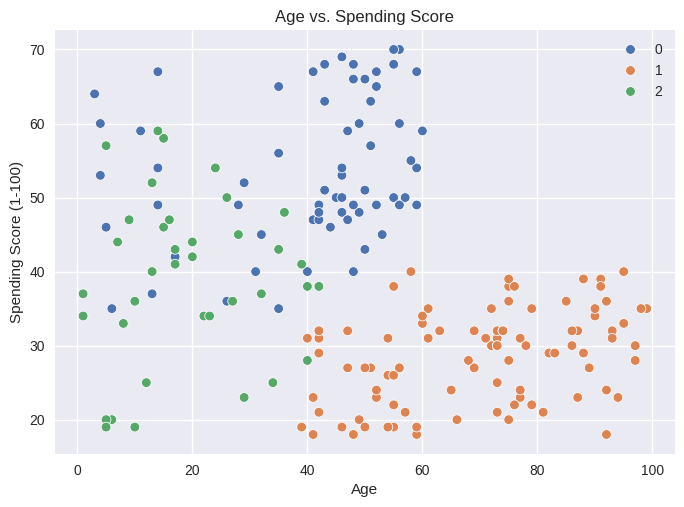

In [ ]:
# K-Means Clustering UMUR vs GAJI

final_model = KMeans(n_clusters= 3, random_state= 42)
final_model.fit(X)

labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])

#plot "Annual Income" vs "Spending Score" with final_model labels
sns.scatterplot(x=df['Spending Score (1-100)'] , y= df['Age'] ,
               hue=labels,
               palette='deep')

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs. Spending Score");

[4 4 2 4 4]


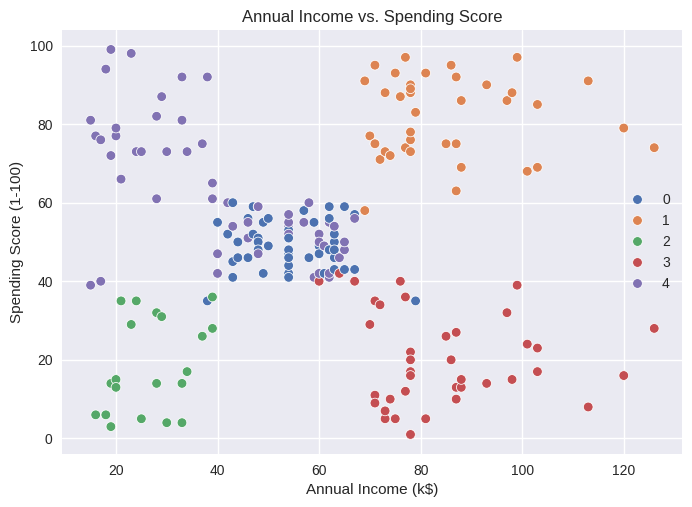

In [ ]:
# K-Means Clustering PENGELUARAN vs GAJI

final_model = KMeans(n_clusters=5 , random_state= 42)
final_model.fit(X)

labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])

#plot "Annual Income" vs "Spending Score" with final_model labels
sns.scatterplot(x=df['Annual Income (k$)'] , y= df['Spending Score (1-100)'] ,
               hue=labels,
               palette='deep')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score");

# Actual Clustering (setelah mendapat nilai fit K)

In [ ]:
# K-Means Algorithm

kmeans = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(X)

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

In [ ]:
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print(kmeans.n_iter_)

8.399174360311452
[[0.52930403 0.1016731  0.18756074]
 [0.14962477 0.38453087 0.44250871]
 [0.28747535 0.62878263 0.82129775]
 [0.50795756 0.66231749 0.17276566]
 [0.73717949 0.35375375 0.49047619]
 [0.14464883 0.10184097 0.79148181]]
7


In [ ]:
# Simpan data yg telah dilabeli

membership = kmeans.labels_
membership.dtype

dtype('int32')

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca   = PCA()
x_pca = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

array([0.48735048, 0.26778184, 0.24486768])

In [ ]:
x_pca.shape

(198, 3)

# Cluster Visualization

In [ ]:
pc = pd.DataFrame(x_pca[:,:2], columns=['pc1', 'pc2'])

In [ ]:
pale_green  = ['#90ee90']
yellow      = ['#ffff66']
orange      = ['#FFA07A']
blue        = ['#1f77b4']
cyan        = ['#17becf']
red         = ['#d62728']

clust_colors = pale_green + yellow + orange + blue + cyan + red

colors = [clust_colors[m] for m in membership]

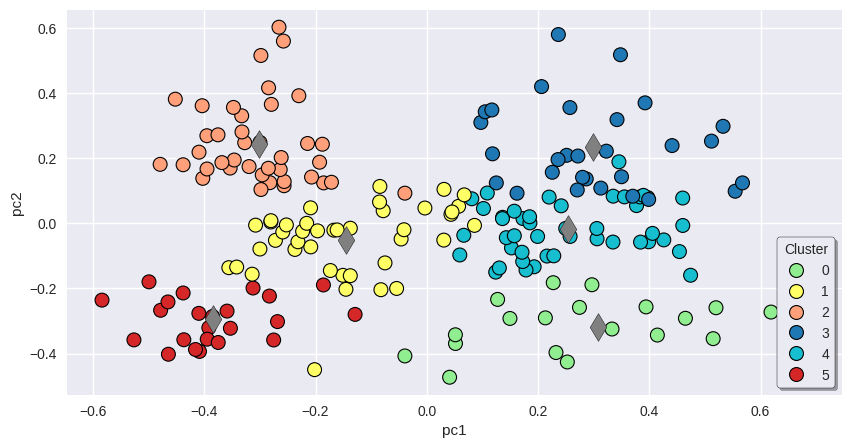

In [ ]:
# Misalkan 'pc' adalah DataFrame yang berisi hasil PCA dan 'membership' adalah hasil clustering
data_pca = pc.copy()
data_pca['Cluster'] = membership

# Membuat plot scatter
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x='pc1', y='pc2', hue='Cluster', palette=clust_colors, data=data_pca, s=100, marker='o', edgecolor='k')

# Menambahkan legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, title="Cluster", loc="lower right", frameon=True, fancybox=True, edgecolor='black', shadow=True)

# Menghitung centroid dari setiap cluster
centroids = data_pca.groupby('Cluster')[['pc1', 'pc2']].mean().reset_index()

# Menambahkan centroid sebagai titik bintang dengan warna abu-abu
for i, centroid in centroids.iterrows():
    ax.scatter(centroid['pc1'], centroid['pc2'], color='gray', s=200, marker='d', edgecolor='black', label=f"Centroid Cluster {centroid['Cluster']}")

# Menampilkan plot
plt.show()


              pc1       pc2
Cluster                    
0        0.308129 -0.317861
1       -0.302370  0.243786
2       -0.145101 -0.050193
3        0.299731  0.233406
4        0.253748 -0.016788
5       -0.384348 -0.295130


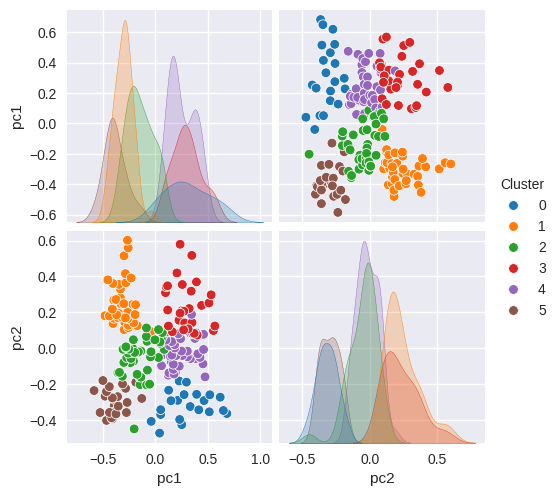

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_pca)
clusters = kmeans.fit_predict(data_pca)

# Denormalisasi data
data_denorm = pd.DataFrame(data=scaler.inverse_transform(X_scaled), columns=data_pca.columns)
data_denorm['Cluster'] = clusters

# Profiling setiap cluster
cluster_profiles = data_denorm.groupby('Cluster').mean()
print(cluster_profiles)

# Visualisasi Profil Cluster (menggunakan pairplot)
sns.pairplot(data_denorm, hue='Cluster', palette='tab10')
plt.show()


In [ ]:
pca_features = pd.DataFrame(x_pca, columns=['pc'+str(i) for i in range(1, x_pca.shape[1]+1)])
# pca_features = pd.DataFrame(x_pca, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])
pca_features

,pc1,pc2,pc3
0,-0.201723,-0.449434,-0.282955
1,-0.464543,-0.402145,0.054450
2,0.041031,-0.472707,-0.516129
3,-0.408637,-0.393501,0.049326
4,-0.039355,-0.407391,-0.123104
...,...,...,...
193,-0.298248,0.514879,0.222337
194,0.348214,0.517131,-0.226781
195,-0.257749,0.559095,0.085575
196,0.236558,0.579177,-0.171301


In [ ]:
df_minmax_vars = df_minmax.var()
df_minmax_vars

,0
Age,0.072660
Annual Income (k$),0.051694
Spending Score (1-100),0.069023


In [ ]:
df_minmax_varsum = sum(df_minmax_vars)

In [ ]:
import pandas as pd
import numpy as np

# Misalkan 'df' adalah DataFrame awal dan 'membership' adalah hasil clustering
df['Cluster'] = membership  # Tambahkan kolom cluster ke dataset awal

# Hitung rataan (mean) setiap fitur untuk masing-masing cluster
cluster_profile = df.groupby('Cluster').mean()

# Tampilkan hasil profiling
print("Hasil Cluster Profiling berdasarkan Rerataan:")
print(cluster_profile)


Hasil Cluster Profiling berdasarkan Rerataan:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        45.523810           26.285714               19.380952
1        25.780488           57.682927               44.365854
2        32.948718           84.794872               81.487179
3        44.413793           88.517241               17.931034
4        56.333333           54.266667               49.066667
5        25.521739           26.304348               78.565217


# Cluster on Principal Components

In [ ]:
kmeans_pca_all = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans_pca_all.fit(pca_features)

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

In [ ]:
from sklearn.metrics import v_measure_score

# The lowest SSE value
print(kmeans_pca_all.inertia_)

# Final locations of the centroid
print(kmeans_pca_all.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_all.n_iter_)

v_measure = v_measure_score(kmeans_pca_all.labels_,kmeans.labels_)
v_measure

8.399174360311449
[[ 0.30812866 -0.31786064 -0.10039133]
 [-0.14510098 -0.05019334 -0.21039331]
 [-0.30236957  0.24378645  0.12275127]
 [ 0.29973142  0.2334059  -0.20542173]
 [ 0.25374757 -0.01678772  0.22351054]
 [-0.38434784 -0.2951302   0.08027393]]
7


1.0

In [ ]:
# On first PCA Feature

kmeans_pca_first = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans_pca_first.fit(pca_features.pc1.values.reshape(-1, 1))

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

In [ ]:
# The lowest SSE value
print(kmeans_pca_first.inertia_)

# Final locations of the centroid
print(kmeans_pca_first.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_first.n_iter_)

v_measure = v_measure_score(kmeans_pca_first.labels_,kmeans.labels_)
v_measure

0.599811911663175
[[-0.40695707]
 [-0.23743867]
 [ 0.52711838]
 [ 0.17996876]
 [ 0.3485354 ]
 [ 0.00345036]]
14


0.45194161570475105

In [ ]:
# On first two PCA features

kmeans_pca_first2 = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans_pca_first2.fit(pca_features[['pc1', 'pc2']])

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

In [ ]:
# The lowest SSE value
print(kmeans_pca_first2.inertia_)

# Final locations of the centroid
print(kmeans_pca_first2.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_first2.n_iter_)

v_measure = v_measure_score(kmeans_pca_first2.labels_,kmeans.labels_)
v_measure

4.65381279391524
[[-0.17070947 -0.0471078 ]
 [ 0.418203   -0.22197307]
 [ 0.32708533  0.2080491 ]
 [ 0.14066269 -0.05243574]
 [-0.31656009  0.25460572]
 [-0.37607648 -0.29241705]]
16


0.6776177768043807

In [ ]:
#On first three PCA features

kmeans_pca_first3 = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans_pca_first3.fit(pca_features[['pc1', 'pc3']])

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

In [ ]:
# The lowest SSE value
print(kmeans_pca_first3.inertia_)

# Final locations of the centroid
print(kmeans_pca_first3.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_first3.n_iter_)

v_measure = v_measure_score(kmeans_pca_first3.labels_,kmeans.labels_)
v_measure

3.6638975607310025
[[-0.34671465  0.12686934]
 [-0.20425421 -0.16373204]
 [ 0.46531426 -0.05379884]
 [ 0.34986076  0.33457791]
 [ 0.19983018 -0.32962847]
 [ 0.13038759  0.05510945]]
11


0.5855732241225661

# Calculation of the Agreement between Clustering on All Data and Results of PCA

In [ ]:
from sklearn.metrics import v_measure_score

Between clustering of original scaled data and all PCA components:

In [ ]:
v_measure_score(kmeans.labels_, kmeans_pca_all.labels_)

1.0

Between clustering of original scaled data and the first PCA component:

In [ ]:
v_measure_score(kmeans.labels_, kmeans_pca_first.labels_)

0.451941615704751

Between clustering of original scaled data and the first two PCA components:


In [ ]:
v_measure_score(kmeans.labels_, kmeans_pca_first2.labels_)

0.6776177768043807

Between clustering of original scaled data and the first two PCA components:

In [ ]:
v_measure_score(kmeans.labels_, kmeans_pca_first3.labels_)

0.5855732241225661